In [34]:
# automatically reload imported modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
%reload_ext autoreload

## training

In [16]:
import helper.get_image
import numpy as np

FOLDER_PATH =  'F://term7//CV//ProjectTrail//A_manualLabel'

# random
train_size = 200
test_size = 100
val_size = 40

img_range = np.arange(1, 800)
X_train_pos_idx, X_test_pos_idx, X_val_pos_idx = helper.get_random_indices(img_range, train_size, test_size, val_size)
X_train_neg_idx, X_test_neg_idx, X_val_neg_idx = helper.get_random_indices(img_range, train_size, test_size, val_size)

X_train, Y_train = helper.get_concrete_data(X_train_pos_idx, X_train_neg_idx, path = FOLDER_PATH)
#X_test , Y_test  = helper.get_concrete_data(X_test_pos_idx, X_test_neg_idx, path = FOLDER_PATH)
#X_val  , Y_val   = helper.get_concrete_data(X_val_pos_idx, X_val_neg_idx, path = FOLDER_PATH)

print( X_train.shape, Y_train.shape )
#print( X_test.shape , Y_test.shape  )
#print( X_val.shape  , Y_val.shape   )

(400, 227, 227) (400,)


In [ ]:
# from filters.filter import GrayscaleNormalizer
# normalizer = GrayscaleNormalizer()
# X_train[:] = normalizer(X_train[:][0]) 
# X_train_flat = X_train.reshape(X_train.shape[0],-1)

In [17]:
from filters.bilateral import bilateral_canny
bilateral_canny = bilateral_canny()
for idx in range(X_train.shape[0]):
    X_train[idx] = bilateral_canny.bilateral_canny_img(X_train[idx]) 

In [18]:
X_train_flat = X_train.reshape(X_train.shape[0],-1)

In [19]:
# train a logistic model
from sklearn import linear_model
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train_flat, Y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Sliding window demonstration on single image

In [1]:
import cv2
import numpy as np
import sys
import matplotlib
from matplotlib import pyplot as plt
import pylab as pl

In [2]:
# automatically reload imported modules
%load_ext autoreload
%autoreload 2

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#FOLDER_PATH = "C:/Users/Dominic/Desktop/Concrete Crack Images for Classification/"



In [69]:
from filters.filter import GrayscaleNormalizer
#PATH = "C:/Users/Dominic/Desktop/VideoFrame/"
#PATH = "F:\\term7\\CV\\ProjectTrail\\VideoFrame\\"
PATH =  'F:/term7/CV/ProjectTrail/A_manualLabel/Positive/'

origin_img = PATH + "00080.jpg"
origin_img = cv2.imread(origin_img, 0).astype(np.float32)
img = origin_img

### If we do normalization of columns

(<matplotlib.text.Text at 0x198278f3f60>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

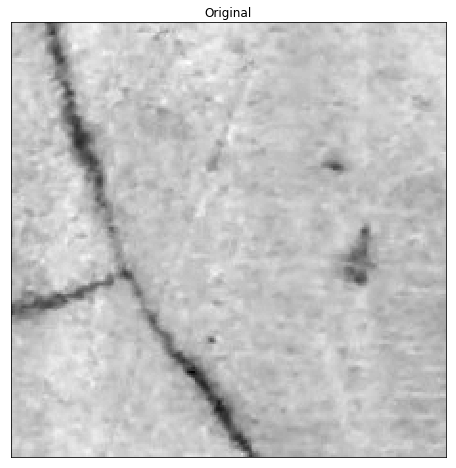

In [70]:

normalizer = GrayscaleNormalizer()
img2 = normalizer(origin_img) 


plt.subplot(111),plt.imshow(img2, cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])

### shadow reduction on normalized image

(227, 227)
(227, 227)


(<matplotlib.text.Text at 0x19827668518>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

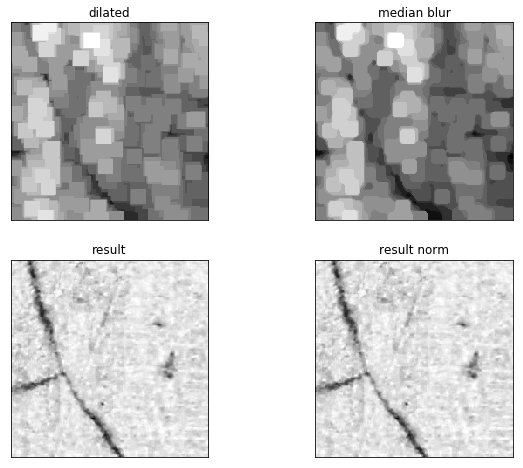

In [72]:

result_planes = []
result_norm_planes = []
plane = img2.astype(np.uint8)
dilated_img = cv2.dilate(plane, np.ones((17,17), np.uint8))

plt.subplot(221)
plt.imshow(dilated_img, cmap='gray')
plt.title('dilated'),plt.xticks([]),plt.yticks([])

dilated_img = dilated_img
bg_img = cv2.medianBlur(dilated_img, 5)

plt.subplot(222)
plt.imshow(bg_img, cmap='gray')
plt.title('median blur'),plt.xticks([]),plt.yticks([])

print(plane.shape) 
print(bg_img.shape)
cv2.absdiff(plane, bg_img)

diff_img = 255 - cv2.absdiff(plane, bg_img)
norm_img= diff_img
norm_img = cv2.normalize(diff_img, norm_img, alpha=0, 
                         beta=255, norm_type=cv2.NORM_MINMAX, 
                         dtype=cv2.CV_8UC1)
result_planes.append(diff_img)
result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

cv2.imwrite('shadows_out.png', result)
cv2.imwrite('shadows_out_norm.png', result_norm)

plt.subplot(223)
plt.imshow(result, cmap='gray')
plt.title('result'),plt.xticks([]),plt.yticks([])

plt.subplot(224)
plt.imshow(result_norm, cmap='gray')
plt.title('result norm'),plt.xticks([]),plt.yticks([])


### shadow reduction on un-normalized image

In [10]:
PATH =  'F:/term7/CV/ProjectTrail/A_manualLabel/Positive/'

origin_img = PATH + "00080.jpg"
origin_img = cv2.imread(origin_img, 0).astype(np.float32)


(227, 227)
(227, 227)


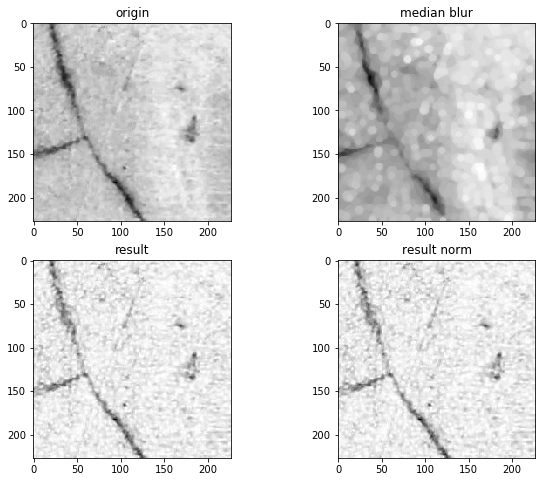

In [73]:
# input is called origin_img


result_planes = []
result_norm_planes = []
plane = origin_img.astype(np.uint8)
dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))

plt.subplot(221)
plt.imshow(origin_img, cmap='gray')
plt.title('origin')

dilated_img = dilated_img
bg_img = cv2.medianBlur(dilated_img, 5)

plt.subplot(222)
plt.imshow(bg_img, cmap='gray')
plt.title('median blur')

print(plane.shape) 
print(bg_img.shape)
cv2.absdiff(plane, bg_img)

diff_img = 255 - cv2.absdiff(plane, bg_img)
norm_img= diff_img
norm_img = cv2.normalize(diff_img, norm_img, alpha=0, 
                         beta=255, norm_type=cv2.NORM_MINMAX, 
                         dtype=cv2.CV_8UC1)
result_planes.append(diff_img)
result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm2 = cv2.merge(result_norm_planes)

cv2.imwrite('shadows_out.png', result)
cv2.imwrite('shadows_out_norm.png', result_norm2)

plt.subplot(223)
plt.imshow(result, cmap='gray')
plt.title('result')

plt.subplot(224)
plt.imshow(result_norm2, cmap='gray')
plt.title('result norm')

### add canny to normed, shadow reduced image

In [79]:
from filters import *
print(dir(filters))

['BilateralCanny', 'GrayscaleNormalizer', '__builtins__', '__cached__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'blackhat', 'cv2', 'linear_model', 'np', 'otsu', 'otsu_img', 'tophat']


# canny only

<function matplotlib.pyplot.show>

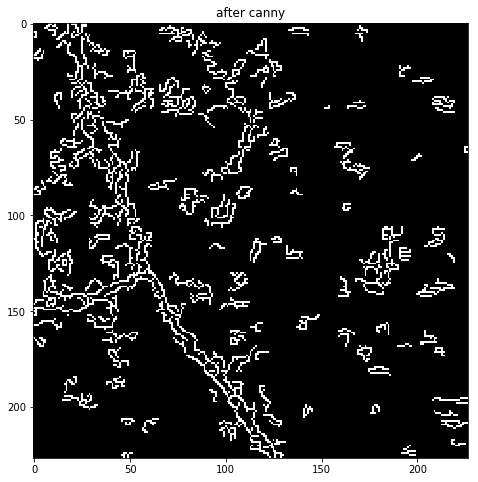

In [76]:
from filters import BilateralCanny
bilateral_canny_video = BilateralCanny()

img_after_norm = result_norm2
img3 = bilateral_canny_video.canny_img(img_after_norm)

plt.imshow(img3, cmap='gray')
plt.title('after canny')
plt.show

# black hat

<function matplotlib.pyplot.show>

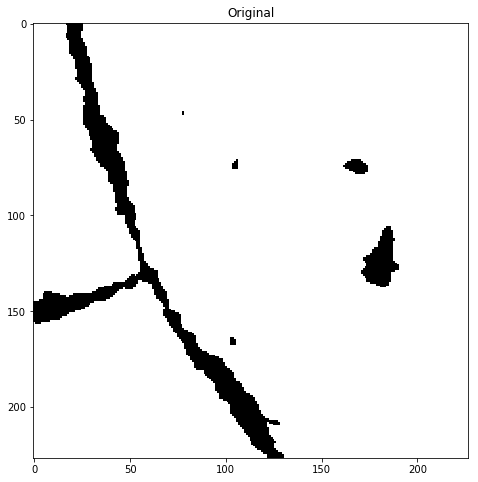

In [81]:
plt.imshow(otsu_img(img2, (5,5)), cmap='gray')
plt.title('Original')
plt.show

#### if add bilateral and canny, resul doesn't look very good. so for video feed, we apply canny only. bilateral filtered out too much information

<function matplotlib.pyplot.show>

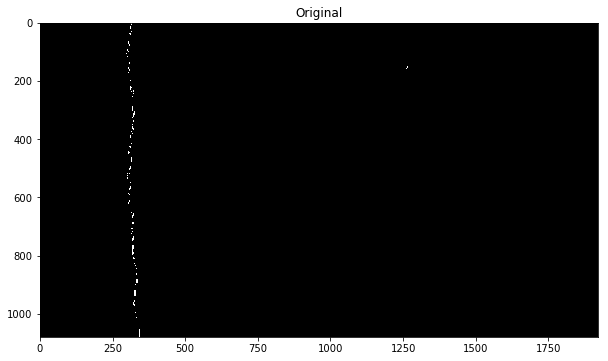

In [111]:
from filters.bilateral import bilateral_canny
bilateral_canny_video = bilateral_canny()

img2 = bilateral_canny_video.bilateral_canny_img(result)

plt.imshow(img2, cmap='gray')
plt.title('Original')
plt.show()

### shadow on single image

Plotting...


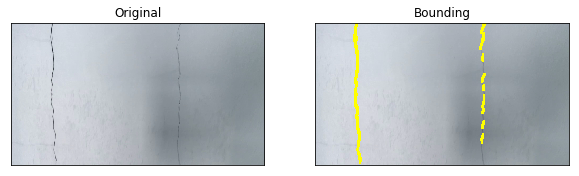

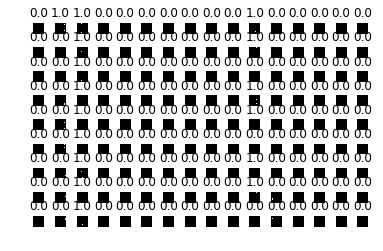

In [27]:
from helper import rolling_window, shade_area
img = frame_after_canny
#stride = (112, 106)
stride = (106,112)
window_size = (227, 227)
imgs = rolling_window(img, window_size, stride)
# for i in range(nx):
#     for j in range(ny):
#         imgs[i, j] = bilateral_canny_video.grayscale_img(imgs[i, j])
# print(imgs.shape)


nx, ny = imgs.shape[0], imgs.shape[1]
plt.figure(figsize=(20, 20 * nx / ny))

result = logistic.predict(imgs.reshape(nx * ny, -1)).reshape(nx, ny)
print("Plotting...")

boxed = shade_area(origin, imgs, result, window_size, stride)

plt.figure(figsize=(10,5))

plt.subplot(121),plt.imshow(origin, cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(boxed, cmap='gray')
plt.title('Bounding'),plt.xticks([]),plt.yticks([])

plt.show()

for i in range(nx):
    for j in range(ny):
        plt.subplot(nx, ny, i * ny + j + 1)
        plt.imshow(imgs[i, j],cmap='gray')
        plt.axis('off')
        plt.title(result[i, j])
        
        
plt.subplots_adjust(wspace=1, hspace=0)
plt.show()

## try adaptive thresholding

In [26]:
from preprocessing import *

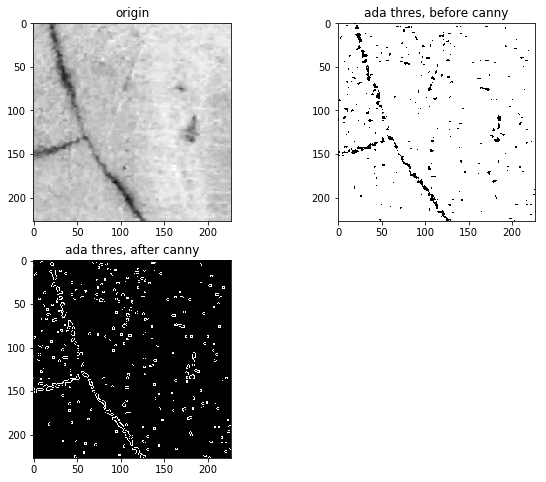

In [29]:

# PATH = "F:\\term7\\CV\\ProjectTrail\\VideoFrame\\"
# origin_img = PATH + "00165.jpg"
# origin = cv2.imread(origin_img)
#origin_img =  cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
adath = shadow_reduction.adaptiveThreshold(origin_img)

bilateral_canny = BilateralCanny()
frame_after_canny = bilateral_canny.canny_img(adath)


plt.subplot(221)
plt.imshow(origin_img, cmap='gray')
plt.title('origin')


plt.subplot(222)
plt.imshow(adath, cmap='gray')
plt.title('ada thres, before canny')


plt.subplot(223)
plt.imshow(frame_after_canny, cmap='gray')
plt.title('ada thres, after canny')
plt.show()

In [35]:
from filters import *

In [37]:
print(dir(filters))

['BilateralCanny', 'GrayscaleNormalizer', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'bilateral', 'cv2', 'filter', 'linear_model', 'morphologic', 'np', 'tophat']


Plotting...


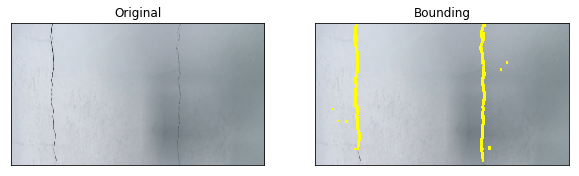

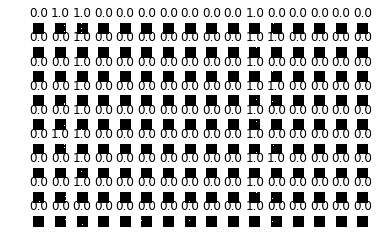

In [81]:
from helper import rolling_window, shade_area
img = frame_after_canny
#stride = (112, 106)
stride = (106,112)
window_size = (227, 227)
imgs = rolling_window(img, window_size, stride)
# for i in range(nx):
#     for j in range(ny):
#         imgs[i, j] = bilateral_canny_video.grayscale_img(imgs[i, j])
# print(imgs.shape)


nx, ny = imgs.shape[0], imgs.shape[1]
plt.figure(figsize=(20, 20 * nx / ny))

result = logistic.predict(imgs.reshape(nx * ny, -1)).reshape(nx, ny)
print("Plotting...")

boxed = shade_area(origin, imgs, result, window_size, stride)

plt.figure(figsize=(10,5))

plt.subplot(121),plt.imshow(origin, cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(boxed, cmap='gray')
plt.title('Bounding'),plt.xticks([]),plt.yticks([])

plt.show()

for i in range(nx):
    for j in range(ny):
        plt.subplot(nx, ny, i * ny + j + 1)
        plt.imshow(imgs[i, j],cmap='gray')
        plt.axis('off')
        plt.title(result[i, j])
        
        
plt.subplots_adjust(wspace=1, hspace=0)
plt.show()